# Лабораторна робота №4 з дисципліни "Штучні нейронні мережі"
### Виконав Чистяков Данило

### Imports


In [45]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.optimizers import Adam

### Data processing

In [28]:
df = pd.read_csv("./data/data.csv")
df.head()
df.drop(['date'], axis=1, inplace=True)

### Створення послідовностей

In [18]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, 0:], data[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [29]:
data = df.values
n_steps = 365
X, y = create_sequences(data, n_steps)

In [30]:
print(X.shape)
print(y.shape)

(3211, 365, 10)
(3211,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

### Model

In [34]:
def create_model(num_time_steps, num_features, optimizer):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(num_time_steps, num_features)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  
    model.compile(optimizer=optimizer, loss='mse')
    return model




In [35]:
model = create_model(365, 10, Adam(learning_rate=0.0003))

I0000 00:00:1732215893.605973    4979 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5494 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1
/mnt/hdd/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


I0000 00:00:1732215917.839159   15526 cuda_dnn.cc:529] Loaded cuDNN version 90300


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 91.8741 - val_loss: 32.9494
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 17.8861 - val_loss: 14.7614
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 14.5191 - val_loss: 14.5237
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 13.8836 - val_loss: 15.1571
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 14.1126 - val_loss: 15.2608
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 13.8602 - val_loss: 14.8795
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 15.0595 - val_loss: 13.2821
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 12.7646 - val_loss: 9.9131
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.8459 - val_loss: 9.3810
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2585 - val_loss: 7.0051
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.8528 - val_loss: 10.5644
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/

In [39]:
y = model.predict(X_train)
mse = mean_squared_error(y_train, y) 
rmse = sqrt(mse)

print("RMSE:", rmse)

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
RMSE: 2.572085803675633


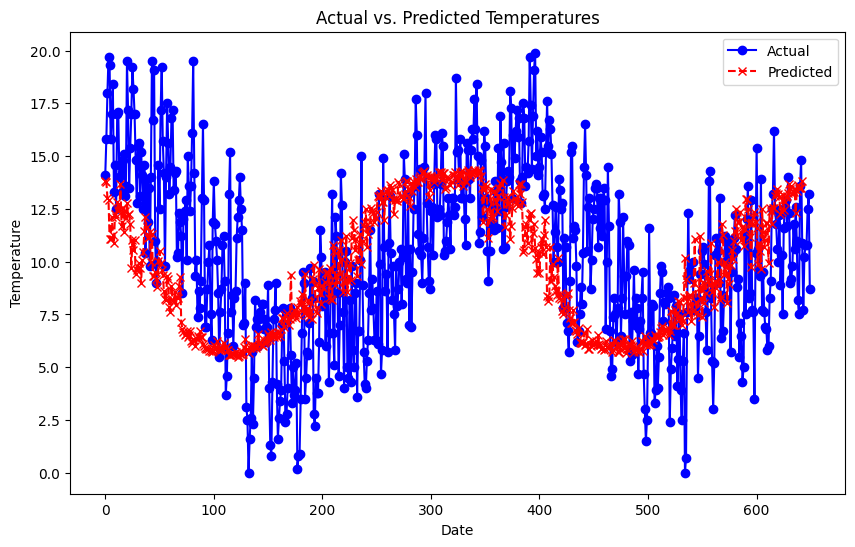

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_train[:650], label='Actual', color='blue', marker='o')
plt.plot(y[:650], label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()